# Data Exploration of Foreclosures in 2020 in Los Angeles

For this assignment I will be exploring the very fun and not at all depressing data of property forclosures in 2020. My goal is to find out where the most foreclosures occured and  if there is a pattern among the lenders that have foreclosed.

In [2]:
import geopandas as gpd

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
# read and add geojson to notebook
foreclosed = gpd.read_file('2020 Registered Foreclosure Properties.geojson')

In [4]:
# what type of data is this
type(foreclosed)

geopandas.geodataframe.GeoDataFrame

In [5]:
# what does the data look like?
foreclosed.head()

,propertymanagementcontact,propertymanagement,registered_date,councildistrict,propertycity,lendercontactphone,property_type,propertymanagementaddress,propertymgmtcontactphone,propertyzip,apn,lon,lendercontact,propertyaddress,lender,lat,propertystate,geometry
0,NULL,NULL,2020-02-26T00:00:00,3,LOS ANGELES,818-845-4000,Single Family,None,NULL,91367,2134029009,-118.56314,Myers Trust,6452 N JUMILLA AVE,Myers Trust,34.18823,CA,POINT (-118.56314 34.18823)
1,MCS LLC,Greenfield Property LLC,2020-05-27T00:00:00,6,LOS ANGELES,888-310-1506,Single Family,4033 Stable Drive Palmdale CA 93552,866-563-1100,91352,2314013026,-118.3771,Amy Lott,7918 N ELOISE AVE,JP Morgan Chase NA,34.21429,CA,POINT (-118.37710 34.21429)
2,NULL,NULL,2020-07-09T00:00:00,12,LOS ANGELES,818-483-0027,Single Family,None,NULL,91324,2783012001,-118.56211,BARRY HARARI,8410 N CORBIN AVE,SUPERIOR LOAN SERVICING,34.22274,CA,POINT (-118.56211 34.22274)
3,NULL,NULL,2020-01-23T00:00:00,11,LOS ANGELES,310-488-5095,Single Family,None,NULL,90066,4223003007,-118.43118,Scott Ehrlich,12933 W WALSH AVE,Scott Ehrlich,33.98646,CA,POINT (-118.43118 33.98646)
4,NULL,NULL,2020-07-10T00:00:00,11,LOS ANGELES,424-781-3765,Single Family,None,NULL,90272,4419014019,-118.54421,Alexander Foster,16620 W LINDA TER,"Arixa Enhanced Income Fund, L.P.",34.04913,CA,POINT (-118.54421 34.04913)


In [6]:
# I'd like to see the last 10 rows of the dataset
foreclosed.tail(10)

,propertymanagementcontact,propertymanagement,registered_date,councildistrict,propertycity,lendercontactphone,property_type,propertymanagementaddress,propertymgmtcontactphone,propertyzip,apn,lon,lendercontact,propertyaddress,lender,lat,propertystate,geometry
2995,EDWARD ZUBIA,SAFEGAURD PROPERTIES,2020-01-08T00:00:00,15,SAN PEDRO,888-349-8964,Multi-Family,3540 WILSHIRE BLVD 1109 LOS ANGELES CA 90010,213-383-2097,90731,7451034024,-118.2948,Code Violations,814 7TH ST,"PNC Bank, N.A., as Trustee, c/o Select Portfol...",33.73798,CA,POINT (-118.29480 33.73798)
2996,Ruth Wagner,"Solid Foundation Properties, LLC",2020-01-23T00:00:00,7,LOS ANGELES,888-456-0714,Single Family,3937 arlington AVE LOS ANGELES CA 90008,844-488-7662,91042,2552047031,-118.29282,Ruth Wagner,11062 N TAMBERLY LANE,Nationstar Mortgage. LLC,34.27013,CA,POINT (-118.29282 34.27013)
2997,Aaron Trevethan,Property Preservation Servicing LLC,2020-01-15T00:00:00,14,LOS ANGELES,888-820-6474,Multi-Family,27071 Cabot RD 119 LAGUNA HILLS CA 92653,949-612-0342,90042,5301012029,-118.18387,Marquita Bullock,559 1/2 E COLEMAN AVE,PHH Mortgage Corporation,34.1026,CA,POINT (-118.18387 34.10260)
2998,Vendor Management,Guardian Asset Management,2020-01-08T00:00:00,3,LOS ANGELES,757-452-5138,Single Family,2021 Hartel ST Leviitown PA 19057,888-872-9094,91324,2104001007,-118.55066,Sarah Richardson,19142 W ROSCOE BLVD,"New Residential Mortgage, LLC",34.22034,CA,POINT (-118.55066 34.22034)
2999,Edward Zubia,Edward Zubia,2020-01-23T00:00:00,8,LOS ANGELES,888-349-8964,Single Family,3540 WILSHIRE BLVD 1109 LOS ANGELES CA 90010,213-804-7437,90044,6033008005,-118.29854,Select Portfolio Servicing,1305 W 81ST ST,Select Portfolio Servicing,33.96591,CA,POINT (-118.29854 33.96591)
3000,MCS LLC,Greenfield Property LLC,2020-01-21T00:00:00,6,LOS ANGELES,954-590-7161,Single Family,4033 Stable Drive Palmdale CA 93552,866-563-1100,91331,2625033002,-118.42371,Frances Guerra,13321 W BRANFORD ST,Bayview Loan Servicing/Bayview Representative,34.23343,CA,POINT (-118.42371 34.23343)
3001,Aaron Noble,Pinelands Preservation,2020-01-09T00:00:00,8,LOS ANGELES,888-310-1506,Single Family,1906 Irvine AVE Newport Beach CA 92660,949-294-8778,90043,4019006027,-118.34887,Amy Lott,4235 W 59TH ST,JP Morgan Chase NA,33.9872,CA,POINT (-118.34887 33.98720)
3002,MCS LLC,Greenfield Property LLC,2020-06-10T00:00:00,8,LOS ANGELES,866-563-1100,Single Family,4033 Stable Drive Palmdale CA 93552,866-563-1100,90007,5054011011,-118.29716,code compliance,2633 S VAN BUREN PL,Carrington Mortgage Services,34.03164,CA,POINT (-118.29716 34.03164)
3003,AL NELSON,AL NELSON,2020-11-24T00:00:00,7,LOS ANGELES,818-203-1006,Single Family,"18653 VENTURA BL., 731 TARZANA CA 91356",818-203-1006,91340,2613024045,-118.44562,AL NELSON,14337 W FOX ST,AL NELSON,34.27217,CA,POINT (-118.44562 34.27217)
3004,Ruth Wagner,"Solid Foundation Properties, LLC",2020-01-23T00:00:00,8,LOS ANGELES,888-456-0714,Single Family,3937 arlington AVE LOS ANGELES CA 90008,844-488-7662,90047,6055015041,-118.30309,Ruth Wagner,1514 W 99TH ST,Nationstar Mortgage. LLC,33.94584,CA,POINT (-118.30309 33.94584)


In [7]:
# what are the data types looking like?
foreclosed.dtypes

propertymanagementcontact      object
propertymanagement             object
registered_date                object
councildistrict                object
propertycity                   object
lendercontactphone             object
property_type                  object
propertymanagementaddress      object
propertymgmtcontactphone       object
propertyzip                    object
apn                            object
lon                            object
lendercontact                  object
propertyaddress                object
lender                         object
lat                            object
propertystate                  object
geometry                     geometry
dtype: object

Cool.

In [8]:
# Now onto info
foreclosed.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3005 entries, 0 to 3004
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   propertymanagementcontact  3005 non-null   object  
 1   propertymanagement         3005 non-null   object  
 2   registered_date            3005 non-null   object  
 3   councildistrict            3005 non-null   object  
 4   propertycity               3005 non-null   object  
 5   lendercontactphone         3005 non-null   object  
 6   property_type              3005 non-null   object  
 7   propertymanagementaddress  2811 non-null   object  
 8   propertymgmtcontactphone   3005 non-null   object  
 9   propertyzip                3005 non-null   object  
 10  apn                        3005 non-null   object  
 11  lon                        3005 non-null   object  
 12  lendercontact              3005 non-null   object  
 13  propertyaddress          

I looked up what "3005 non-null" means and...I'm still not too sure. Hopefully it's not a problem later.

In [9]:
# how many rows and columns
foreclosed.shape

(3005, 18)

In [10]:
# what are the columns
foreclosed.columns.to_list()

['propertymanagementcontact',
 'propertymanagement',
 'registered_date',
 'councildistrict',
 'propertycity',
 'lendercontactphone',
 'property_type',
 'propertymanagementaddress',
 'propertymgmtcontactphone',
 'propertyzip',
 'apn',
 'lon',
 'lendercontact',
 'propertyaddress',
 'lender',
 'lat',
 'propertystate',
 'geometry']

In [11]:
# I'm going to try and get the values for a few different columns to see what's there
foreclosed['property_type'].sample(5)

519     Single Family
2674    Single Family
2322    Single Family
1499    Single Family
1244    Single Family
Name: property_type, dtype: object

In [12]:
foreclosed.lender.sample(5)

1403    E JAMES ANDERSON c/o RUSHMORE LOAN MANAGEMENT ...
1525                                              bayview
1240                                       CIT BANK, N.A.
1445                                          DANCO, INC.
1431                        Shellpoint Mortgage Servicing
Name: lender, dtype: object

In [13]:
foreclosed['councildistrict'].sample(5)

357      9
1151     4
2255    15
2462    15
2540    15
Name: councildistrict, dtype: object

In [14]:
# will value counts work here?
foreclosed['property_type'].value_counts()

Single Family         2480
Multi-Family           456
Vacant Residential      41
Non-Residential         28
Name: property_type, dtype: int64

In [15]:
foreclosed['lender'].value_counts()

Nationstar Mortgage. LLC                             274
PHH Mortgage Corporation                             269
Select Portfolio Servicing                           254
Shellpoint Mortgage Servicing                        117
PHH Mortgage/Ocwen Financial Corporation              85
                                                    ... 
Jordan Bennett                                         1
AKBAR S AFREDI C/O BANK OF AMERICA                     1
YNI LLC                                                1
LUNA ADRIAN C/O RUSHMORE LOAN MANAGEMENT SERVICES      1
AL NELSON                                              1
Name: lender, Length: 563, dtype: int64

I forget how to expand that ellipses but it seems as though there are a substantial number of different lenders that served these foreclosures.

In [16]:
foreclosed['councildistrict'].value_counts()

8     367
12    332
3     283
7     246
4     242
9     208
15    200
5     194
6     180
2     179
10    156
14    133
11    128
1      86
13     71
Name: councildistrict, dtype: int64

In [17]:
foreclosed['propertymanagement'].value_counts()

Edward Zubia                           321
Solid Foundation Properties, LLC       312
NULL                                   194
Guardian Asset Management              173
SAFEGAURD PROPERTIES                   146
                                      ... 
Keller Williams Dba Desert Holdings      1
Compass                                  1
Strunzo Development Corp.                1
Bill Mundee Lender                       1
AL NELSON                                1
Name: propertymanagement, Length: 299, dtype: int64

In [18]:
foreclosed['propertyzip'].value_counts()

91342    100
91331    100
90044     94
90047     87
90003     80
        ... 
90212      1
90013      1
91505      1
90010      1
91617      1
Name: propertyzip, Length: 116, dtype: int64

From here, I'll be using the property type and council district columns to finish out the data exploration. Before I do that though, I'll give  a brief review of my findings: 1) District 8 seems to the the site of the most foreclures, 2) 2,480 foreclosures were of single family homes and only 456 were multi-family properties and 3) Nationstar Mortgage, LLC is the lender who foreclosed on 274 properties. During a pandemic.  

In [19]:
propertytype_count = foreclosed['property_type'].value_counts()

In [20]:
council_district = foreclosed['councildistrict'].value_counts()
# for the two columns above, I've made them both new variables.

In [21]:
# now I'll convert each series into a dataframe.
propertytype_count = propertytype_count.reset_index()

In [22]:
council_district = council_district.reset_index()

In [23]:
type(propertytype_count)

pandas.core.frame.DataFrame

In [24]:
type(council_district)

pandas.core.frame.DataFrame

Time to rename things!

In [25]:
# current columns as a list
propertytype_count.columns.to_list()

['index', 'property_type']

In [26]:
propertytype_count

,index,property_type
0,Single Family,2480
1,Multi-Family,456
2,Vacant Residential,41
3,Non-Residential,28


In [27]:
propertytype_count.columns = ['property_type', 'count']

In [28]:
propertytype_count

,property_type,count
0,Single Family,2480
1,Multi-Family,456
2,Vacant Residential,41
3,Non-Residential,28


In [29]:
council_district

,index,councildistrict
0,8,367
1,12,332
2,3,283
3,7,246
4,4,242
5,9,208
6,15,200
7,5,194
8,6,180
9,2,179


In [30]:
council_district.columns = ['council district', 'count']

In [31]:
council_district

,council district,count
0,8,367
1,12,332
2,3,283
3,7,246
4,4,242
5,9,208
6,15,200
7,5,194
8,6,180
9,2,179


In [32]:
#now I'm going to make some bar plots to see what the two varibale look like as a graph

<AxesSubplot:>

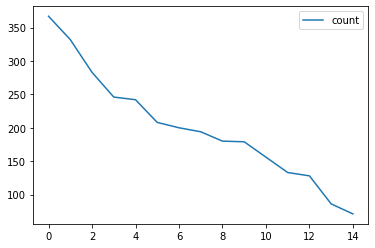

In [33]:
council_district.plot()

<AxesSubplot:title={'center':'Number of Foreclosed Properties per Los Angeles City Council District'}, xlabel='council district'>

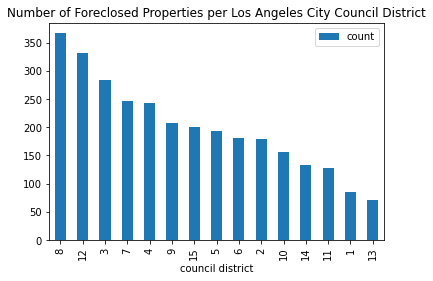

In [42]:
# this tells me nothing so I'm going to add some arguments
council_district.plot.bar(x = 'council district', y = 'count', title = 'Number of Foreclosed Properties per Los Angeles City Council District')


<AxesSubplot:>

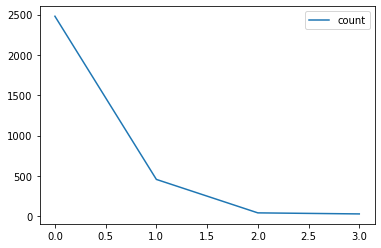

In [36]:
# now I'll do the same with property type
propertytype_count.plot()

<AxesSubplot:title={'center':'Number of Foreclosed Properties per Property Type'}, xlabel='property_type'>

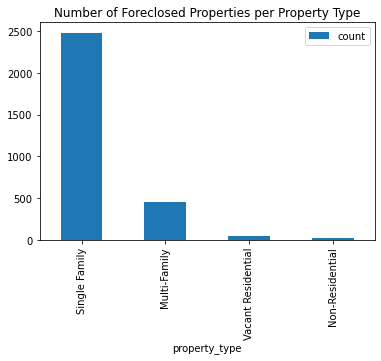

In [40]:
# again nothing that can be easily understood so I will add some arguments
propertytype_count.plot.bar(x = 'property_type', y = 'count', title = 'Number of Foreclosed Properties per Property Type')

I'm going to move on now to trimming the data for this dataset. I'll be getting rid of about 7-8 columns.

In [43]:
foreclosed.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3005 entries, 0 to 3004
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   propertymanagementcontact  3005 non-null   object  
 1   propertymanagement         3005 non-null   object  
 2   registered_date            3005 non-null   object  
 3   councildistrict            3005 non-null   object  
 4   propertycity               3005 non-null   object  
 5   lendercontactphone         3005 non-null   object  
 6   property_type              3005 non-null   object  
 7   propertymanagementaddress  2811 non-null   object  
 8   propertymgmtcontactphone   3005 non-null   object  
 9   propertyzip                3005 non-null   object  
 10  apn                        3005 non-null   object  
 11  lon                        3005 non-null   object  
 12  lendercontact              3005 non-null   object  
 13  propertyaddress          

In [44]:
foreclosed[['propertycity', 'propertyzip', 'councildistrict', 'property_type', 'apn', 'lender', 'propertymanagement', 'lon', 'lat', 'geometry']]

,propertycity,propertyzip,councildistrict,property_type,apn,lender,propertymanagement,lon,lat,geometry
0,LOS ANGELES,91367,3,Single Family,2134029009,Myers Trust,NULL,-118.56314,34.18823,POINT (-118.56314 34.18823)
1,LOS ANGELES,91352,6,Single Family,2314013026,JP Morgan Chase NA,Greenfield Property LLC,-118.3771,34.21429,POINT (-118.37710 34.21429)
2,LOS ANGELES,91324,12,Single Family,2783012001,SUPERIOR LOAN SERVICING,NULL,-118.56211,34.22274,POINT (-118.56211 34.22274)
3,LOS ANGELES,90066,11,Single Family,4223003007,Scott Ehrlich,NULL,-118.43118,33.98646,POINT (-118.43118 33.98646)
4,LOS ANGELES,90272,11,Single Family,4419014019,"Arixa Enhanced Income Fund, L.P.",NULL,-118.54421,34.04913,POINT (-118.54421 34.04913)
...,...,...,...,...,...,...,...,...,...,...
3000,LOS ANGELES,91331,6,Single Family,2625033002,Bayview Loan Servicing/Bayview Representative,Greenfield Property LLC,-118.42371,34.23343,POINT (-118.42371 34.23343)
3001,LOS ANGELES,90043,8,Single Family,4019006027,JP Morgan Chase NA,Pinelands Preservation,-118.34887,33.9872,POINT (-118.34887 33.98720)
3002,LOS ANGELES,90007,8,Single Family,5054011011,Carrington Mortgage Services,Greenfield Property LLC,-118.29716,34.03164,POINT (-118.29716 34.03164)
3003,LOS ANGELES,91340,7,Single Family,2613024045,AL NELSON,AL NELSON,-118.44562,34.27217,POINT (-118.44562 34.27217)


I can also so this by creating a new varibale titled desired columns with all the columns I want to keep. Right now though, I'll continue on with the double brackets method.

In order to keep this new subset of brackets, I have to "declare" it as a new varible which I will do below. The new dataset will be named "foreclosed_trimmed".

In [45]:
foreclosed_trimmed = foreclosed[['propertycity', 'propertyzip', 'councildistrict', 'property_type', 'apn', 'lender', 'propertymanagement', 'lon', 'lat', 'geometry']].copy()

In [46]:
foreclosed_trimmed

,propertycity,propertyzip,councildistrict,property_type,apn,lender,propertymanagement,lon,lat,geometry
0,LOS ANGELES,91367,3,Single Family,2134029009,Myers Trust,NULL,-118.56314,34.18823,POINT (-118.56314 34.18823)
1,LOS ANGELES,91352,6,Single Family,2314013026,JP Morgan Chase NA,Greenfield Property LLC,-118.3771,34.21429,POINT (-118.37710 34.21429)
2,LOS ANGELES,91324,12,Single Family,2783012001,SUPERIOR LOAN SERVICING,NULL,-118.56211,34.22274,POINT (-118.56211 34.22274)
3,LOS ANGELES,90066,11,Single Family,4223003007,Scott Ehrlich,NULL,-118.43118,33.98646,POINT (-118.43118 33.98646)
4,LOS ANGELES,90272,11,Single Family,4419014019,"Arixa Enhanced Income Fund, L.P.",NULL,-118.54421,34.04913,POINT (-118.54421 34.04913)
...,...,...,...,...,...,...,...,...,...,...
3000,LOS ANGELES,91331,6,Single Family,2625033002,Bayview Loan Servicing/Bayview Representative,Greenfield Property LLC,-118.42371,34.23343,POINT (-118.42371 34.23343)
3001,LOS ANGELES,90043,8,Single Family,4019006027,JP Morgan Chase NA,Pinelands Preservation,-118.34887,33.9872,POINT (-118.34887 33.98720)
3002,LOS ANGELES,90007,8,Single Family,5054011011,Carrington Mortgage Services,Greenfield Property LLC,-118.29716,34.03164,POINT (-118.29716 34.03164)
3003,LOS ANGELES,91340,7,Single Family,2613024045,AL NELSON,AL NELSON,-118.44562,34.27217,POINT (-118.44562 34.27217)


I'll be using this new trimmed dataset for the next two commands: querying data and plotting the data on map(!)

In [47]:
# there are a few ways I can query data

In [48]:
foreclosed_trimmed[foreclosed_trimmed.property_type == 'Single Family']

,propertycity,propertyzip,councildistrict,property_type,apn,lender,propertymanagement,lon,lat,geometry
0,LOS ANGELES,91367,3,Single Family,2134029009,Myers Trust,NULL,-118.56314,34.18823,POINT (-118.56314 34.18823)
1,LOS ANGELES,91352,6,Single Family,2314013026,JP Morgan Chase NA,Greenfield Property LLC,-118.3771,34.21429,POINT (-118.37710 34.21429)
2,LOS ANGELES,91324,12,Single Family,2783012001,SUPERIOR LOAN SERVICING,NULL,-118.56211,34.22274,POINT (-118.56211 34.22274)
3,LOS ANGELES,90066,11,Single Family,4223003007,Scott Ehrlich,NULL,-118.43118,33.98646,POINT (-118.43118 33.98646)
4,LOS ANGELES,90272,11,Single Family,4419014019,"Arixa Enhanced Income Fund, L.P.",NULL,-118.54421,34.04913,POINT (-118.54421 34.04913)
...,...,...,...,...,...,...,...,...,...,...
3000,LOS ANGELES,91331,6,Single Family,2625033002,Bayview Loan Servicing/Bayview Representative,Greenfield Property LLC,-118.42371,34.23343,POINT (-118.42371 34.23343)
3001,LOS ANGELES,90043,8,Single Family,4019006027,JP Morgan Chase NA,Pinelands Preservation,-118.34887,33.9872,POINT (-118.34887 33.98720)
3002,LOS ANGELES,90007,8,Single Family,5054011011,Carrington Mortgage Services,Greenfield Property LLC,-118.29716,34.03164,POINT (-118.29716 34.03164)
3003,LOS ANGELES,91340,7,Single Family,2613024045,AL NELSON,AL NELSON,-118.44562,34.27217,POINT (-118.44562 34.27217)


In [49]:
# I know this is correct because the rows  x columns match the number entries for single family properties.

In [50]:
# now I'm going to use the .loc method and the .query method to show this command

In [53]:
foreclosed_trimmed.loc[foreclosed_trimmed['property_type'] == 'Multi-Family']

,propertycity,propertyzip,councildistrict,property_type,apn,lender,propertymanagement,lon,lat,geometry
12,LOS ANGELES,93063,3,Multi-Family,2779012006,PHH Mortgage Corporation,"Kash Construction and Management, INC.",-118.59433,34.22446,POINT (-118.59433 34.22446)
13,LOS ANGELES,90037,9,Multi-Family,5001021015,"U.S. Bank National Association, as Indenture T...",Cargile Company Realtors In,-118.28456,33.99157,POINT (-118.28456 33.99157)
16,LOS ANGELES,90001,9,Multi-Family,6023032010,"U.S. Bank National Association, as Trustee",Coldwell Banker Coastal Alliance,-118.26406,33.96755,POINT (-118.26406 33.96755)
23,LOS ANGELES,90062,8,Multi-Family,5015002030,Fay Servicing LLC - Eric Moore,MCS,-118.31346,34.00201,POINT (-118.31346 34.00201)
25,LOS ANGELES,90043,8,Multi-Family,4012023004,Mor Financial Services,BSI Financial,-118.33139,33.96901,POINT (-118.33139 33.96901)
...,...,...,...,...,...,...,...,...,...,...
2977,SAN PEDRO,90731,15,Multi-Family,7465001005,BUTLER LORI C/O RUSHMORE LOAN MANAGEMENT SERVICES,SAFEGAURD PROPERTIES,-118.29172,33.72415,POINT (-118.29172 33.72415)
2982,LOS ANGELES,90063,14,Multi-Family,5179016011,1 Sharpe Opportunity Intermediate Trust,Center Street Lending,-118.19509,34.03584,POINT (-118.19509 34.03584)
2984,LOS ANGELES,90012,14,Multi-Family,5161025019,Celink,J & J BOARD- UPS/FIVE BROTHERS,-118.24266,34.04781,POINT (-118.24266 34.04781)
2995,SAN PEDRO,90731,15,Multi-Family,7451034024,"PNC Bank, N.A., as Trustee, c/o Select Portfol...",SAFEGAURD PROPERTIES,-118.2948,33.73798,POINT (-118.29480 33.73798)


In [55]:
foreclosed_trimmed.query("property_type == 'Vacant Residential'")

,propertycity,propertyzip,councildistrict,property_type,apn,lender,propertymanagement,lon,lat,geometry
78,LOS ANGELES,90041,14,Vacant Residential,5683025016,"PCG2 Holdings, LLC","Cyprexx Services, LLC",-118.22119,34.1388,POINT (-118.22119 34.13880)
79,HOLLYWOOD,90069,4,Vacant Residential,5562015018,"PCG2 Holdings, LLC",NULL,-118.38211,34.1055,POINT (-118.38211 34.10550)
107,LOS ANGELES,90065,1,Vacant Residential,5462002016,Lewia H. Tennis,Lucero Enterprises,-118.22618,34.11414,POINT (-118.22618 34.11414)
126,LOS ANGELES,90039,13,Vacant Residential,5422012016,"SoCal Vestors, LLC",NULL,-118.25678,34.09433,POINT (-118.25678 34.09433)
133,LOS ANGELES,91604,2,Vacant Residential,2378025031,"Kodiak Capital Management, LLC",NULL,-118.37954,34.1373,POINT (-118.37954 34.13730)
256,LOS ANGELES,91423,4,Vacant Residential,2385011014,David Huang,NULL,-118.41836,34.12929,POINT (-118.41836 34.12929)
271,LOS ANGELES,91356,3,Vacant Residential,2184011004,Lien Holder,NULL,-118.52963,34.15303,POINT (-118.52963 34.15303)
276,LOS ANGELES,90032,14,Vacant Residential,5213007031,SoCal Investments,Socal Investments,-118.18268,34.08748,POINT (-118.18268 34.08748)
328,LOS ANGELES,90272,11,Vacant Residential,4416020063,Houshang Aframian,null,-118.56269,34.042,POINT (-118.56269 34.04200)
340,LOS ANGELES,90032,14,Vacant Residential,5223009006,Anchor Loans,Anchor Loans LP,-118.1774,34.06592,POINT (-118.17740 34.06592)


Time to make a map! The plot command and the geotry column will be used to do this.

<AxesSubplot:>

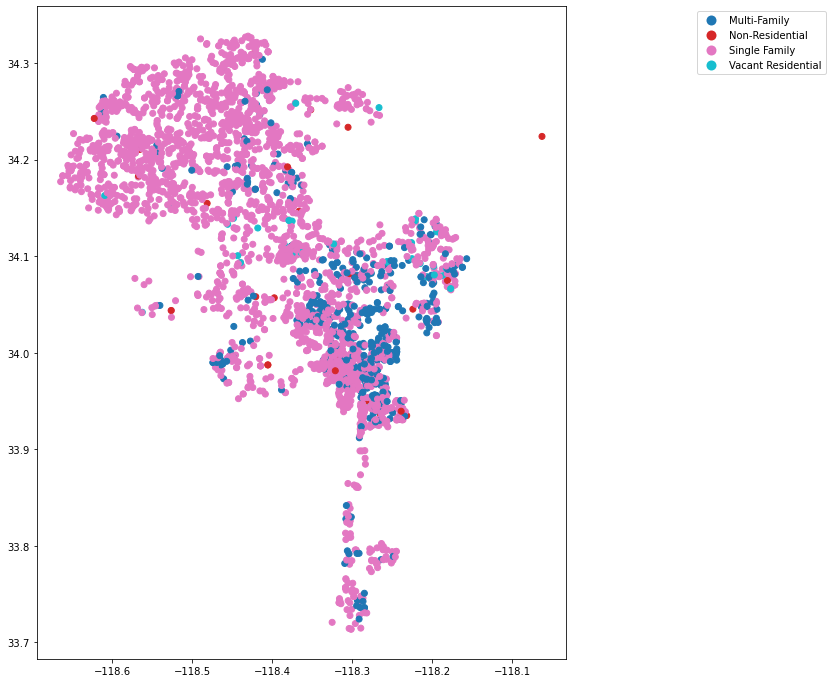

In [60]:
foreclosed_trimmed.plot(
    figsize = (20,12),
    column = 'property_type',
    legend = True,
    legend_kwds = {'loc':'upper right',
                   'bbox_to_anchor':(1.5,1)
                  }
    )

And that concludes my data exploration!